## Wine Quality Prediction


        -Objective: Predict the quality of wine on a scale (e.g., 0 to 10) based on physicochemical properties such as acidity, pH, alcohol content, and sugar levels.

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [52]:
# Load the white wine dataset
file_path_white = 'd:/Coding/Python/winequality-white-fixed.csv'
data_white = pd.read_csv(file_path_white)

# Display the first few rows
data_white.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [53]:
#check for missing values
data_white.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [54]:
#check the data types of each column:
data_white.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [55]:
#summary statistics
data_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


## Data Cleaning

In [56]:
#check for duplicates rows
data_white.duplicated().sum()
len(data_white)


4898

In [57]:
#remove duplicates
data_white = data_white.drop_duplicates()
len(data_white)

3961

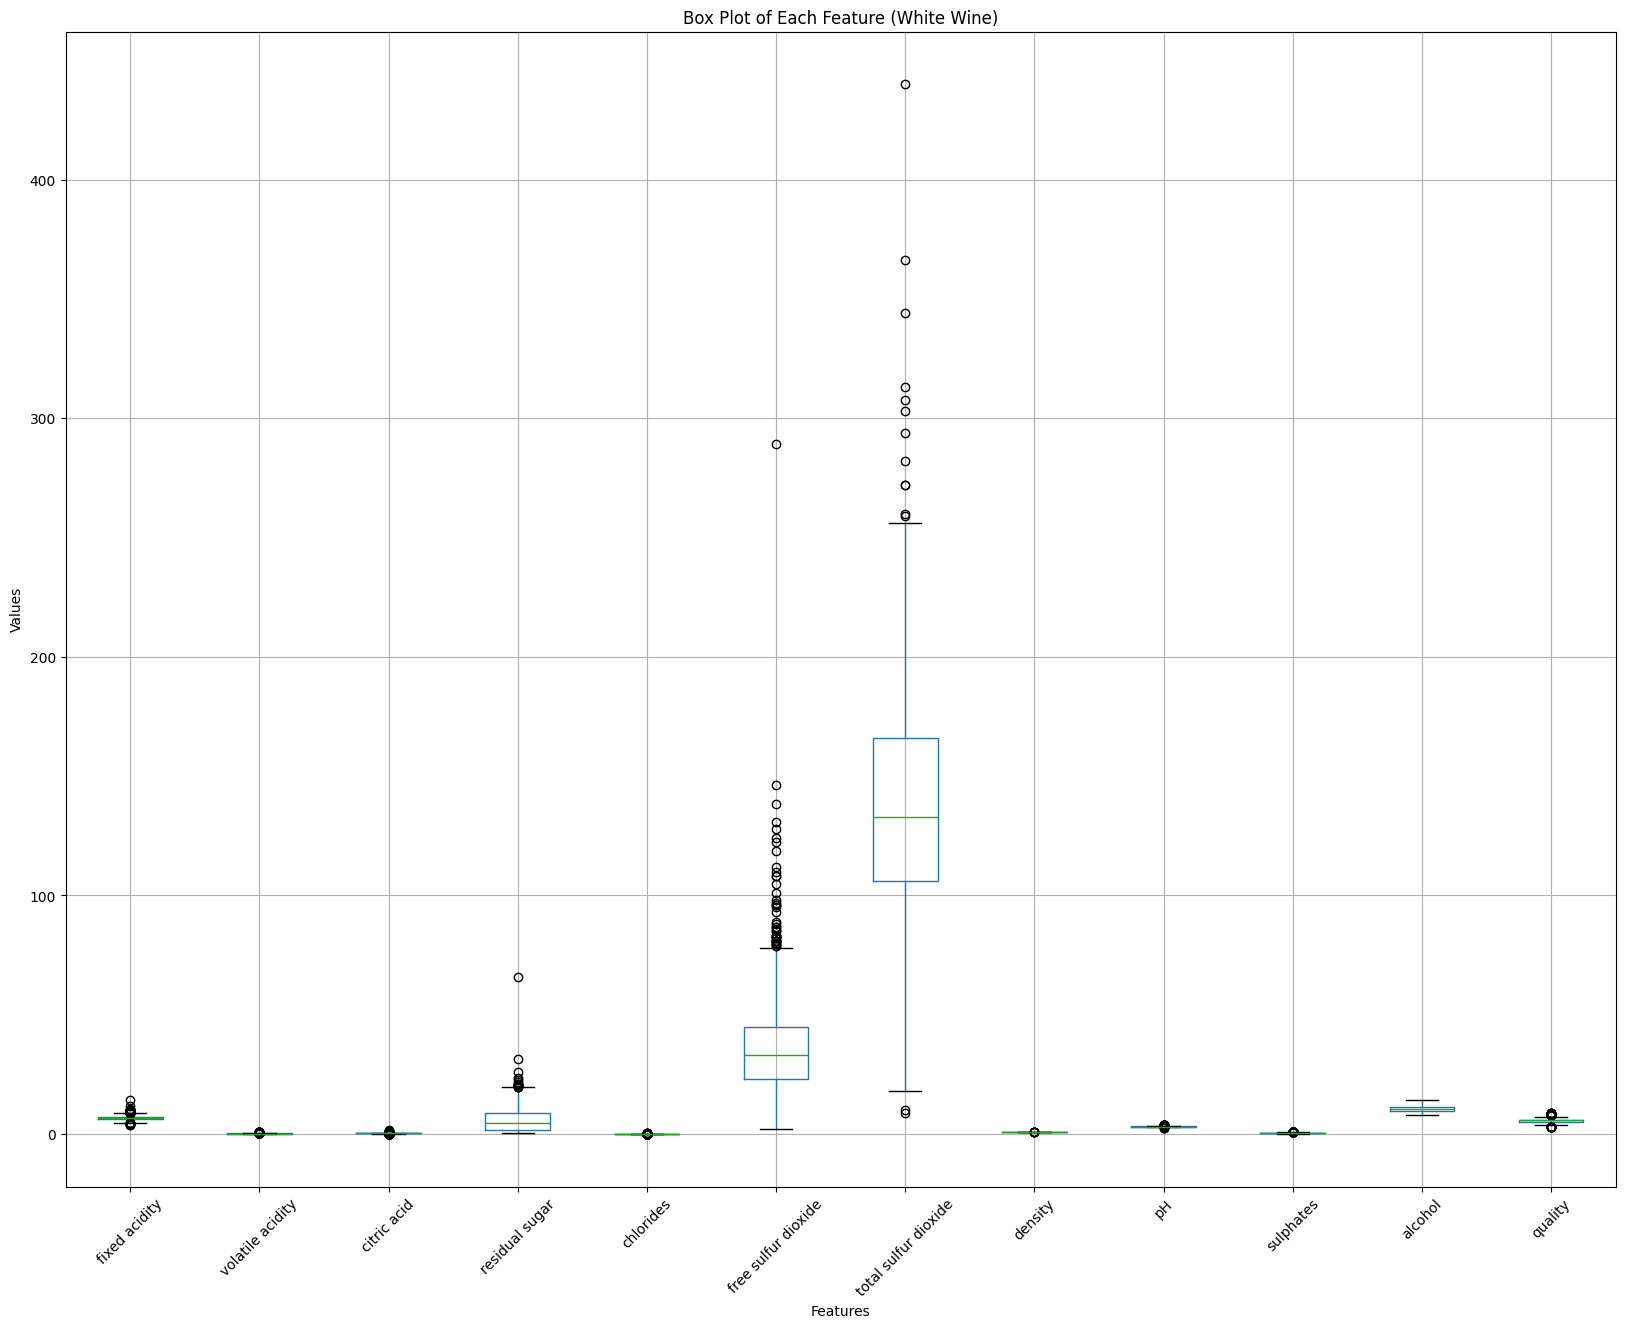

In [58]:
# Visualize the outliers of each feature using box plots
plt.figure(figsize=(20, 15))
data_white.boxplot()
plt.xticks(rotation=45)
plt.title('Box Plot of Each Feature (White Wine)')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

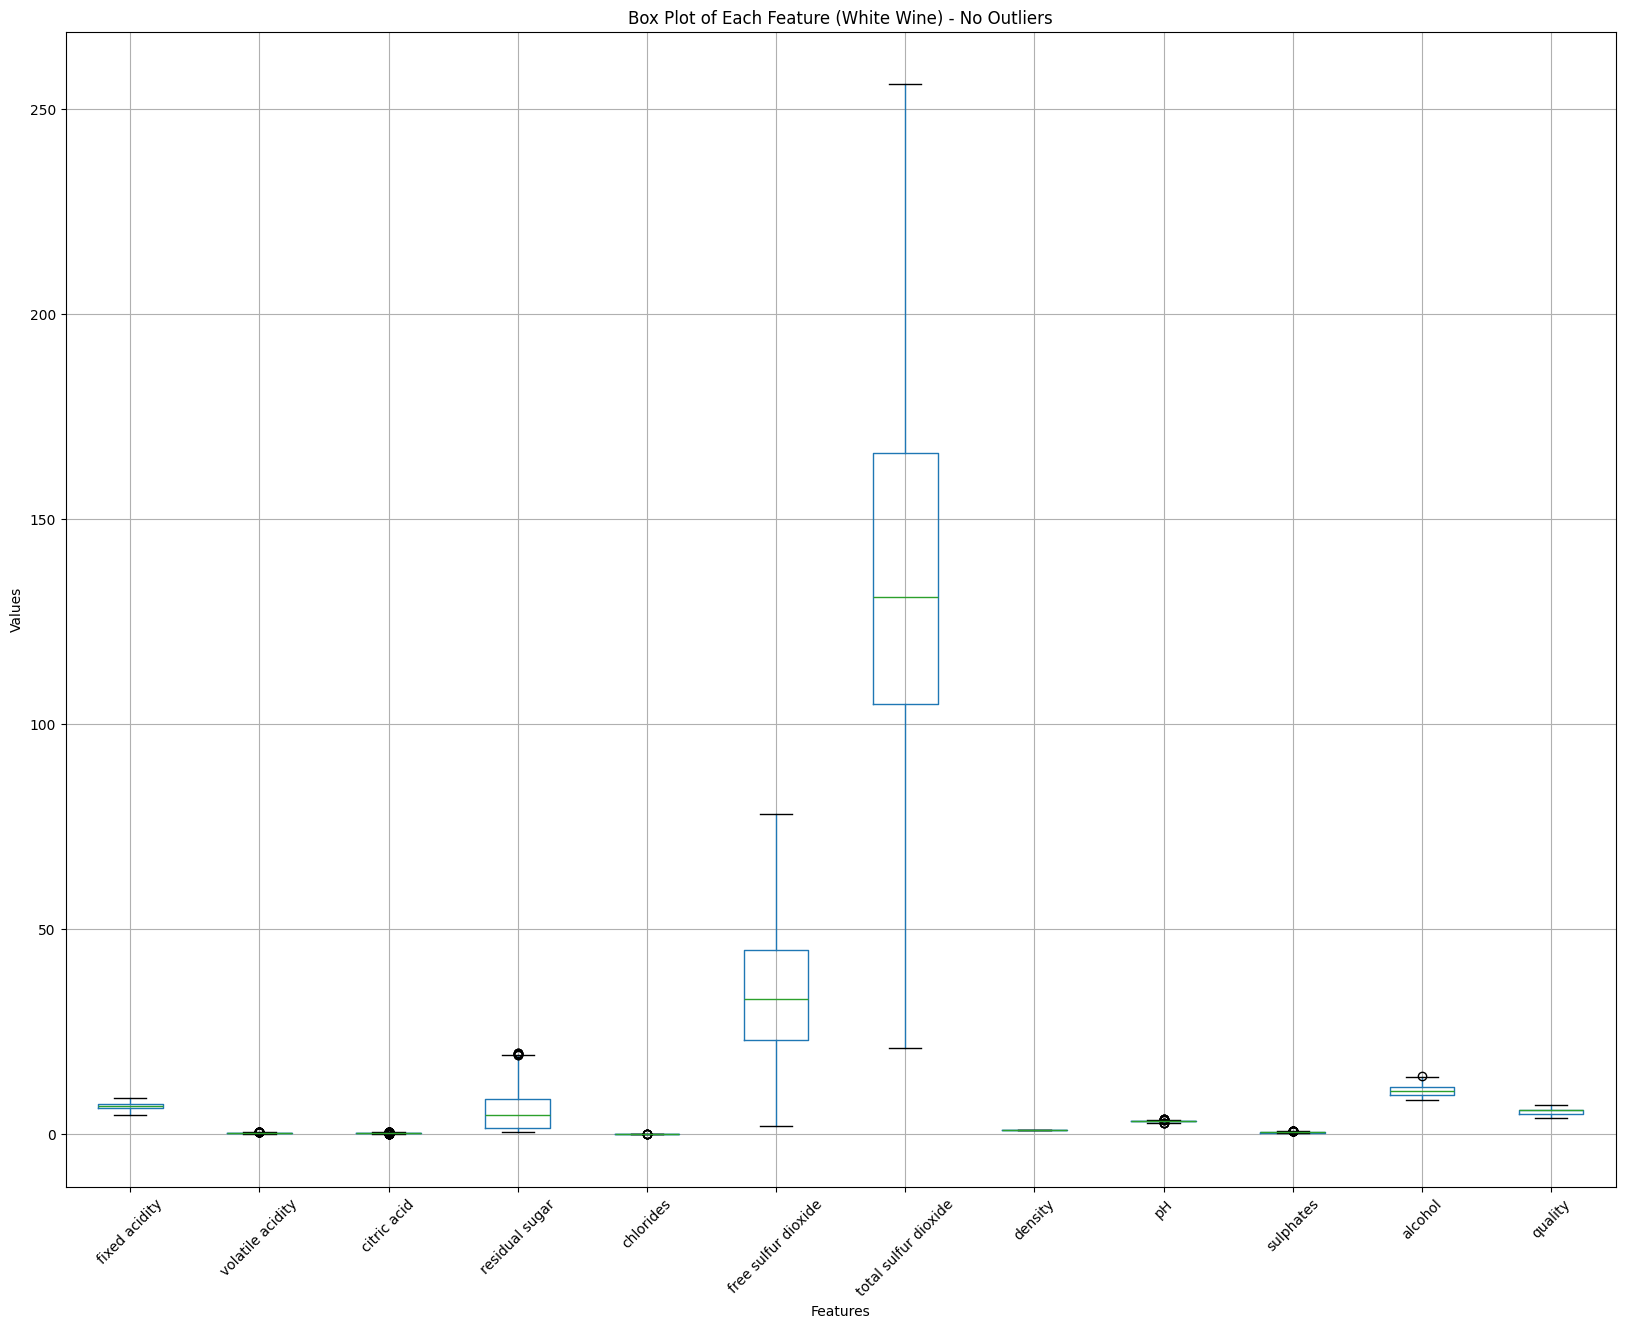

In [59]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each feature
Q1 = data_white.quantile(0.25)
Q3 = data_white.quantile(0.75)
IQR = Q3 - Q1

# Remove outliers using IQR method
data_white_clean = data_white[~((data_white < (Q1 - 1.5 * IQR)) | (data_white > (Q3 + 1.5 * IQR))).any(axis=1)]

# Visualize the data after removing outliers
plt.figure(figsize=(20, 15))
data_white_clean.boxplot()
plt.xticks(rotation=45)
plt.title('Box Plot of Each Feature (White Wine) - No Outliers')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

In [60]:
data_white = data_white_clean

## Perform EDA

1. Target Variable Analysis(quality)

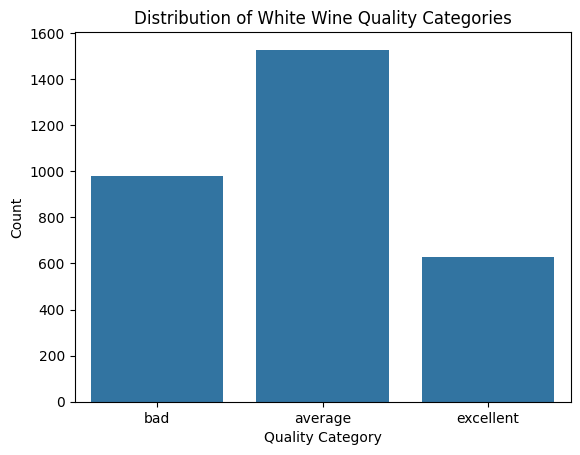

In [61]:
# Define bins and labels for quality scores
bins = [0, 5, 6, 10]
labels = ['bad', 'average', 'excellent']

# Create a new column 'quality_category' with binned quality scores
data_white['quality_category'] = pd.cut(data_white['quality'], bins=bins, labels=labels)

# Plot the distribution of quality categories
sns.countplot(x='quality_category', data=data_white)
plt.title('Distribution of White Wine Quality Categories')
plt.xlabel('Quality Category')
plt.ylabel('Count')
plt.show()

2. Feature-Target Relationship

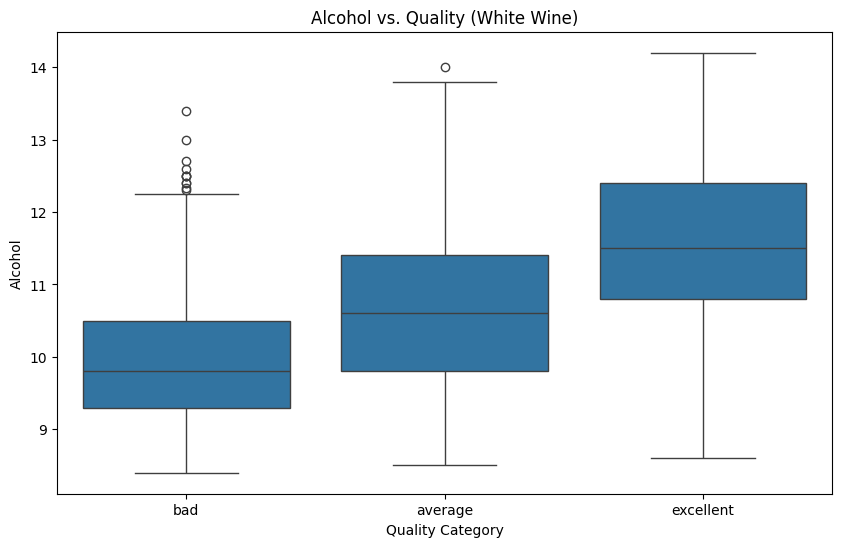

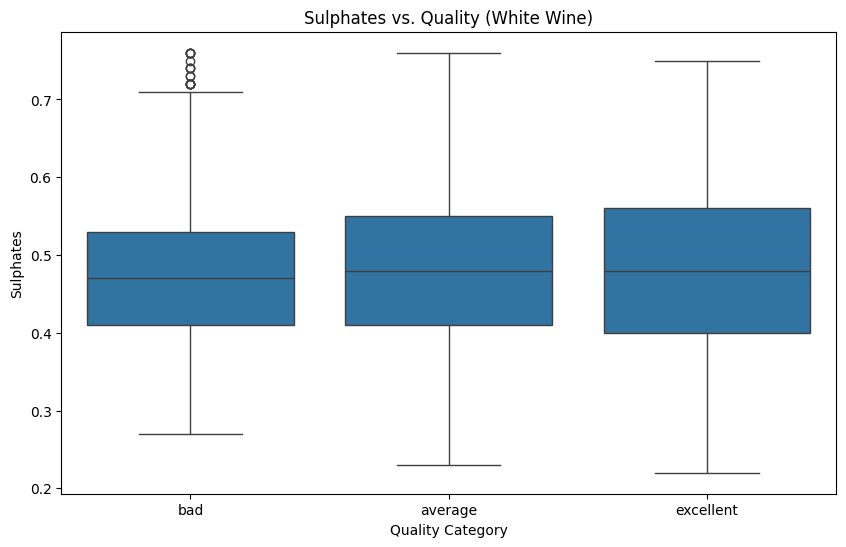

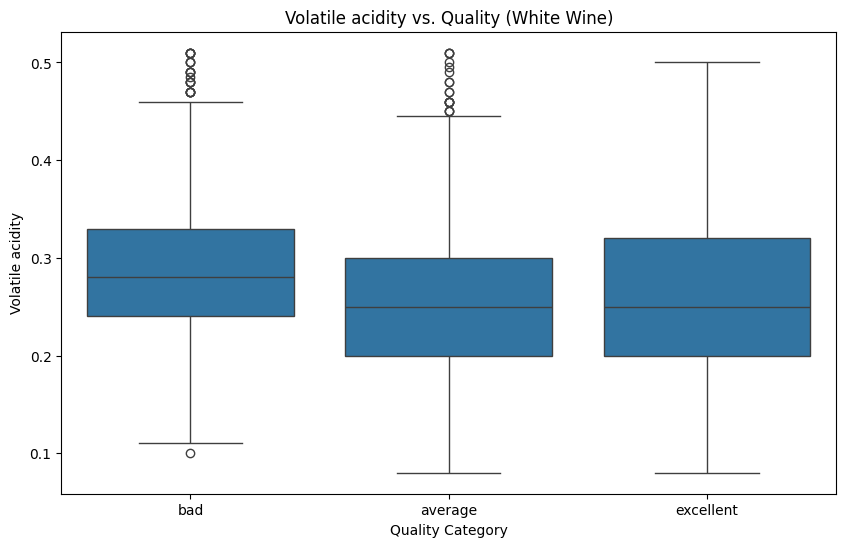

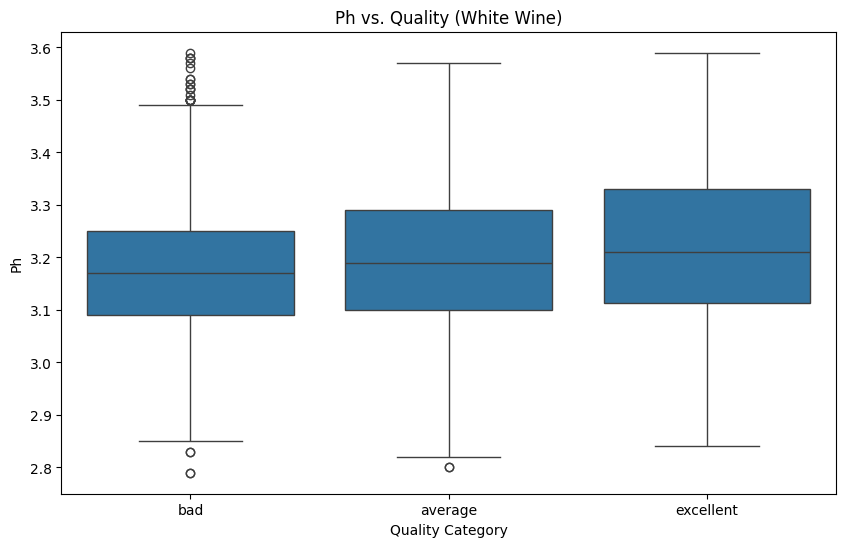

In [62]:
# Key Features vs. Quality
key_features = ['alcohol', 'sulphates', 'volatile acidity', 'pH']

for feature in key_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='quality_category', y=feature, data=data_white)
    plt.title(f'{feature.capitalize()} vs. Quality (White Wine)')
    plt.xlabel('Quality Category')
    plt.ylabel(feature.capitalize())
    plt.show()

Feature Interactions

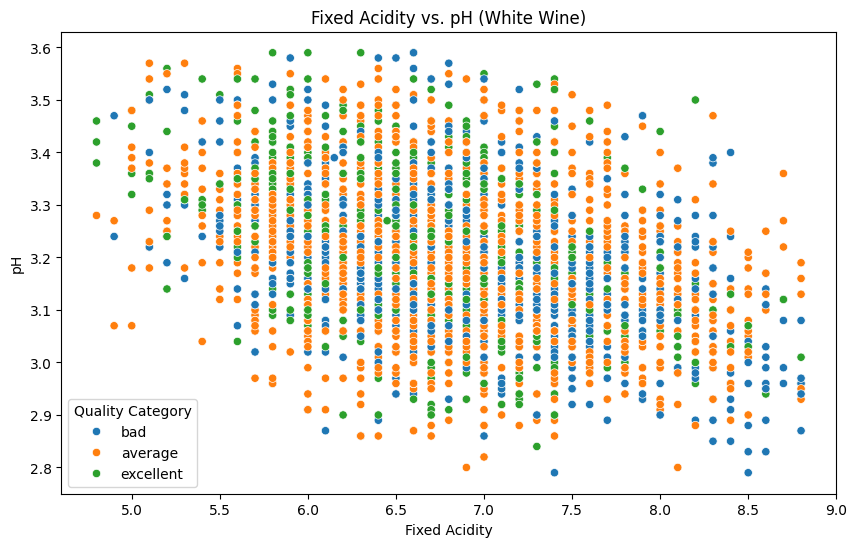

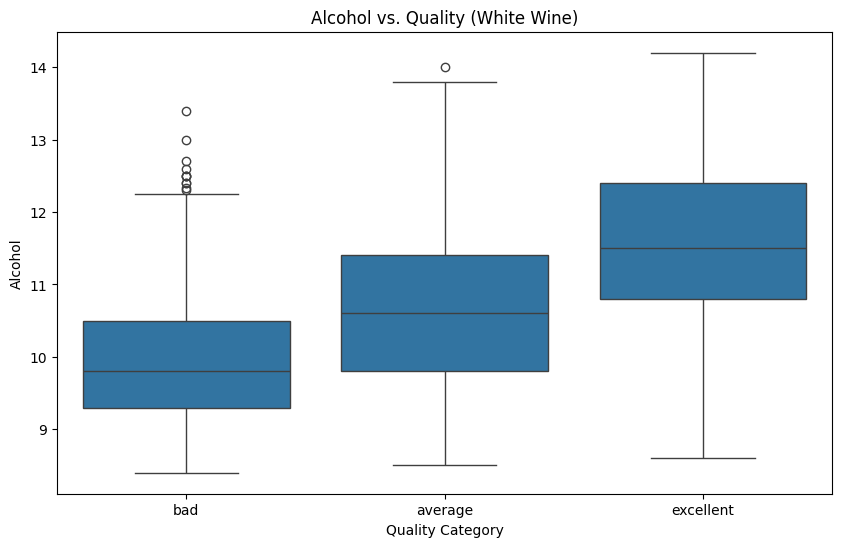

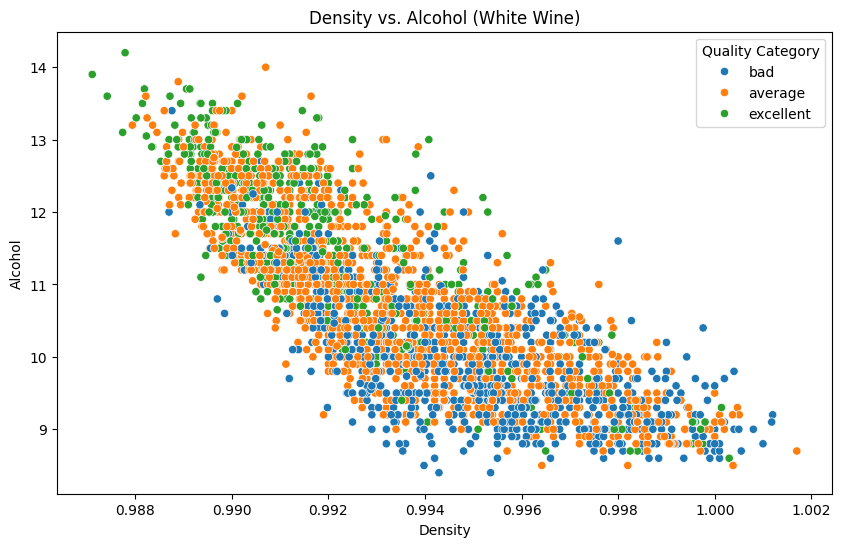

In [63]:
# fixed acidity vs. pH
plt.figure(figsize=(10, 6))
sns.scatterplot(x='fixed acidity', y='pH', hue='quality_category', data=data_white)
plt.title('Fixed Acidity vs. pH (White Wine)')
plt.xlabel('Fixed Acidity')
plt.ylabel('pH')
plt.legend(title='Quality Category')
plt.show()

# alcohol vs. quality
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality_category', y='alcohol', data=data_white)
plt.title('Alcohol vs. Quality (White Wine)')
plt.xlabel('Quality Category')
plt.ylabel('Alcohol')
plt.show()

# density vs. alcohol
plt.figure(figsize=(10, 6))
sns.scatterplot(x='density', y='alcohol', hue='quality_category', data=data_white)
plt.title('Density vs. Alcohol (White Wine)')
plt.xlabel('Density')
plt.ylabel('Alcohol')
plt.legend(title='Quality Category')
plt.show()

pH and Acidity Analysis

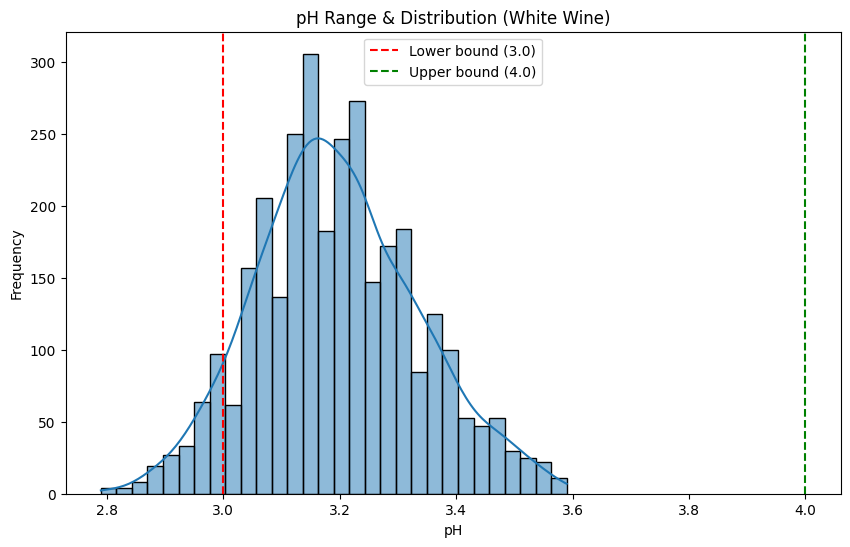

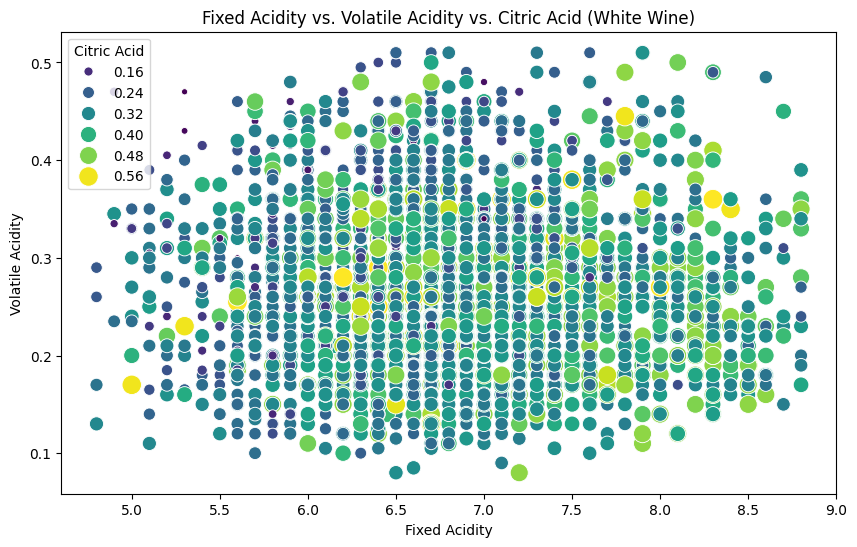

In [64]:
# pH Range & Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data_white['pH'], bins=30, kde=True)
plt.axvline(x=3.0, color='r', linestyle='--', label='Lower bound (3.0)')
plt.axvline(x=4.0, color='g', linestyle='--', label='Upper bound (4.0)')
plt.title('pH Range & Distribution (White Wine)')
plt.xlabel('pH')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Acidity Composition Breakdown
plt.figure(figsize=(10, 6))
sns.scatterplot(x='fixed acidity', y='volatile acidity', hue='citric acid', size='citric acid', data=data_white, palette='viridis', sizes=(20, 200))
plt.title('Fixed Acidity vs. Volatile Acidity vs. Citric Acid (White Wine)')
plt.xlabel('Fixed Acidity')
plt.ylabel('Volatile Acidity')
plt.legend(title='Citric Acid')
plt.show()

Sulfur Dioxide Effects

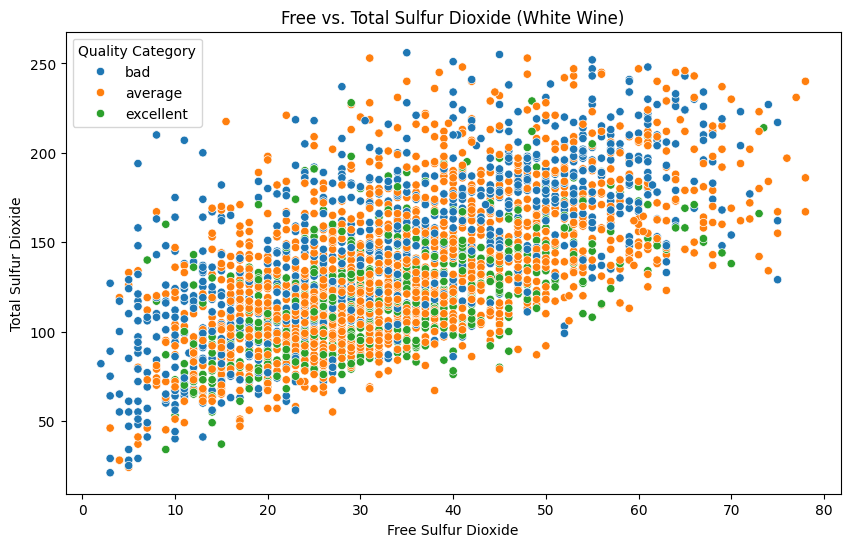

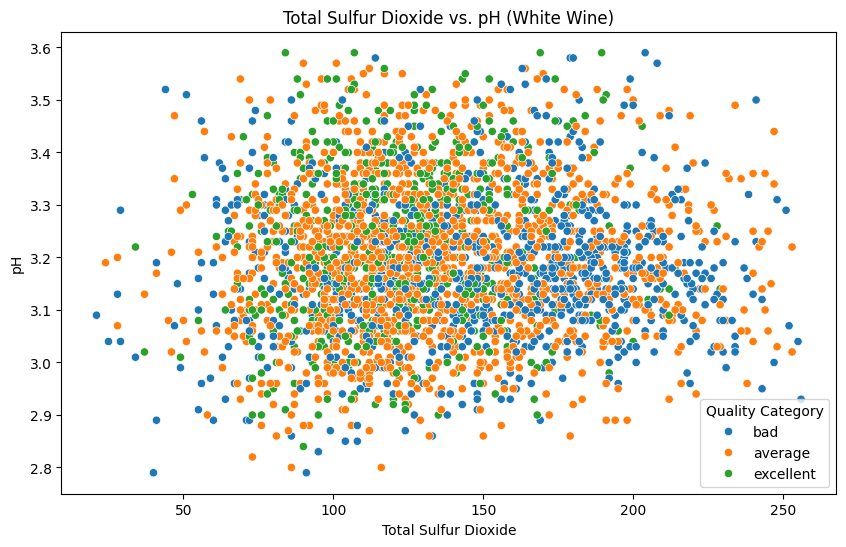

In [65]:
# Free vs. Total Sulfur Dioxide
plt.figure(figsize=(10, 6))
sns.scatterplot(x='free sulfur dioxide', y='total sulfur dioxide', hue='quality_category', data=data_white)
plt.title('Free vs. Total Sulfur Dioxide (White Wine)')
plt.xlabel('Free Sulfur Dioxide')
plt.ylabel('Total Sulfur Dioxide')
plt.legend(title='Quality Category')
plt.show()

# Sulfur Dioxide and pH Relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total sulfur dioxide', y='pH', hue='quality_category', data=data_white)
plt.title('Total Sulfur Dioxide vs. pH (White Wine)')
plt.xlabel('Total Sulfur Dioxide')
plt.ylabel('pH')
plt.legend(title='Quality Category')
plt.show()

Density Analysis

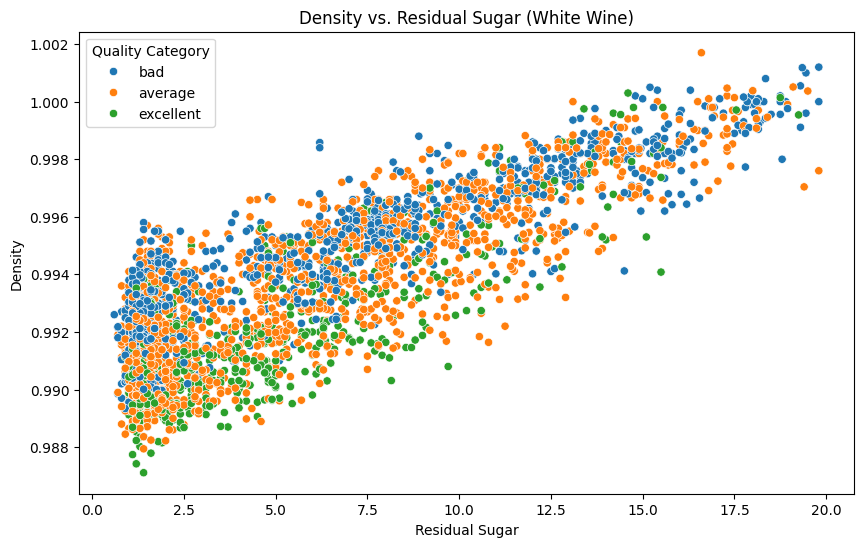

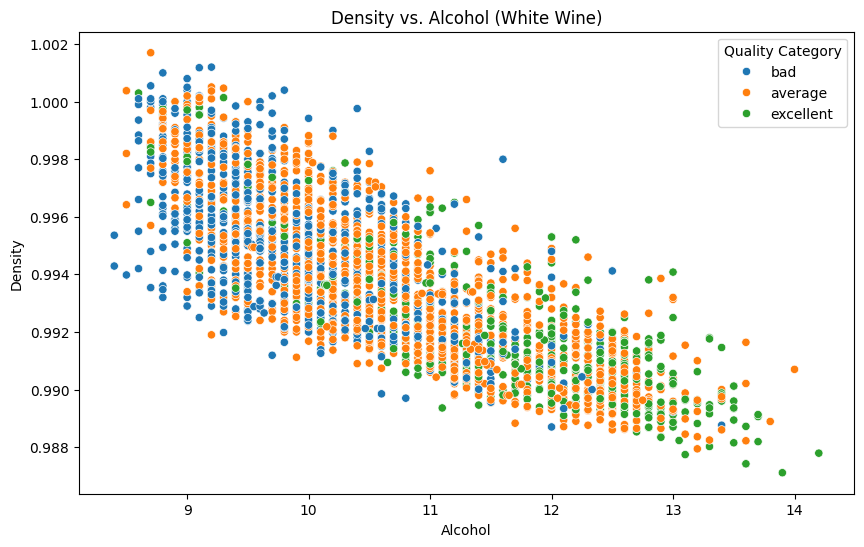

In [66]:
# Density vs. Residual Sugar
plt.figure(figsize=(10, 6))
sns.scatterplot(x='residual sugar', y='density', hue='quality_category', data=data_white)
plt.title('Density vs. Residual Sugar (White Wine)')
plt.xlabel('Residual Sugar')
plt.ylabel('Density')
plt.legend(title='Quality Category')
plt.show()

# Density vs. Alcohol
plt.figure(figsize=(10, 6))
sns.scatterplot(x='alcohol', y='density', hue='quality_category', data=data_white)
plt.title('Density vs. Alcohol (White Wine)')
plt.xlabel('Alcohol')
plt.ylabel('Density')
plt.legend(title='Quality Category')
plt.show()

Feature Engineering

In [67]:
# Feature Engineering: Creating new features
data_white['acidity_ratio'] = data_white['fixed acidity'] / data_white['volatile acidity']
data_white['sulfur_balance'] = data_white['free sulfur dioxide'] / data_white['total sulfur dioxide']
data_white['sugar_alcohol_ratio'] = data_white['residual sugar'] / data_white['alcohol']

# Display the first few rows to verify the new features
print(data_white[['acidity_ratio', 'sulfur_balance', 'sugar_alcohol_ratio']].head())

   acidity_ratio  sulfur_balance  sugar_alcohol_ratio
1      21.000000        0.106061             0.168421
2      28.928571        0.309278             0.683168
3      31.304348        0.252688             0.858586
6      19.375000        0.220588             0.729167
9      36.818182        0.217054             0.136364


In [68]:
# Feature Selection
# Assuming 'quality_category' is the column to predict
X = data_white.drop(columns=['quality', 'quality_category'])
y = data_white['quality_category']

In [70]:
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew

# Define numeric features
numeric_features = data_white.select_dtypes(include=[np.number]).columns.tolist()

# Calculate skewness before scaling or normalization
skewness_before = data_white[numeric_features].apply(skew)
print("Skewness before scaling or normalization:\n", skewness_before)

# Apply log1p transformation to highly skewed features (skewness > 1)
highly_skewed_features = skewness_before[skewness_before > 1].index
data_white[highly_skewed_features] = data_white[highly_skewed_features].apply(np.log1p)

# Save the weight for demo purposes (mean and std for scaling)
scaler = StandardScaler()
scaler.fit(data_white[numeric_features])

# Perform scaling
data_white_scaled = scaler.transform(data_white[numeric_features])

# Convert the scaled data back to a DataFrame
data_white_scaled = pd.DataFrame(data_white_scaled, columns=numeric_features)

# Calculate skewness after scaling or normalization
skewness_after = data_white_scaled.apply(skew)
print("Skewness after scaling or normalization:\n", skewness_after)

Skewness before scaling or normalization:
 fixed acidity           0.223691
volatile acidity        0.501313
citric acid             0.412137
residual sugar          0.857582
chlorides               0.097019
free sulfur dioxide     0.311217
total sulfur dioxide    0.322589
density                 0.335231
pH                      0.205074
sulphates               0.412591
alcohol                 0.393402
quality                -0.133548
acidity_ratio           1.218144
sulfur_balance          0.207526
sugar_alcohol_ratio     1.037756
dtype: float64
Skewness after scaling or normalization:
 fixed acidity           0.223691
volatile acidity        0.501313
citric acid             0.412137
residual sugar          0.857582
chlorides               0.097019
free sulfur dioxide     0.311217
total sulfur dioxide    0.322589
density                 0.335231
pH                      0.205074
sulphates               0.412591
alcohol                 0.393402
quality                -0.133548
acidity_r

In [71]:
from sklearn.model_selection import train_test_split

# Split the Dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Define the features to be scaled
features_to_scale = X.columns

# Refit the scaler on the training data without the 'quality' column
scaler.fit(X_train[features_to_scale])

# Scale the training and testing data
X_train_scaled = scaler.transform(X_train[features_to_scale])
X_test_scaled = scaler.transform(X_test[features_to_scale])

# Initialize the LogisticRegression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Train the model
log_reg.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test_scaled)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')

Classification Report:
               precision    recall  f1-score   support

     average       0.53      0.72      0.61       293
         bad       0.62      0.49      0.55       213
   excellent       0.53      0.26      0.35       121

    accuracy                           0.55       627
   macro avg       0.56      0.49      0.50       627
weighted avg       0.56      0.55      0.54       627

Accuracy Score: 0.5534290271132376


In [ ]:
# from sklearn.model_selection import cross_val_predict, cross_val_score
# from sklearn.metrics import classification_report
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import SMOTE
# #
# # Define the features and target
# X = data_white.drop(columns=['quality', 'quality_category'])
# y = data_white['quality_category']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Resample the training data using SMOTE
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# # Initialize the RandomForestClassifier
# rf = RandomForestClassifier(random_state=42)

# # Perform cross-validation and get predictions
# y_train_pred_cv = cross_val_predict(rf, X_train_resampled, y_train_resampled, cv=5)

# # Generate classification report
# print("Classification Report:\n", classification_report(y_train_resampled, y_train_pred_cv))

# # Perform cross-validation and get scores
# cv_scores = cross_val_score(rf, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')

# print(f'Cross-Validation Scores: {cv_scores}')
# print(f'Mean Cross-Validation Score: {cv_scores.mean()}')

Classification Report:
               precision    recall  f1-score   support

     average       0.89      0.80      0.84      1936
         bad       0.96      0.99      0.97      1936
   excellent       0.84      0.91      0.87      1936

    accuracy                           0.90      5808
   macro avg       0.90      0.90      0.90      5808
weighted avg       0.90      0.90      0.90      5808

Cross-Validation Scores: [0.87349398 0.88640275 0.90361446 0.91128338 0.91128338]
Mean Cross-Validation Score: 0.8972155880813769
